# K-Means Clustering

K-means is an **unsupervised learning** algorithm that learns the features of a dataset and tries to "figure out" the groups (categories, which are the "k" value) based on similarities. These groups are classified by their distance to a **centroid**, which is the mean of a cluster group. K-means can help identify segments of data points that have similar features, even though they may not belong to the same target category. Unsupervised learning is less about trying to predict the correct categories, moreso than it is about finding trends of data points that seem to be similar. 

![Supervised vs Unsupervised learning](https://notebooks.azure.com/priesterkc/projects/testdb/raw/kmeans_cluster.png)

Source: [Towards Data Science: Unsupervised Learning with Python](https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03)

In [1]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#use dataset with
location = "datasets/kmeansdata5.csv"
df = pd.read_csv(location)

#in this dataframe, features 1 & 2 are the characteristics of each data point (predictive features) 
#C is the target variable (categories to predict)
df

,feature1,feature2,category
0,9,69,0
1,17,79,0
2,24,56,0
3,36,68,0
4,41,53,0
5,45,86,0
6,74,85,1
7,80,63,1
8,81,68,1
9,92,86,1


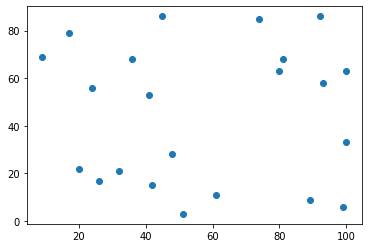

In [3]:
#plot data points to visually see where they are
#on small and distinctive dataset, easier to see clusters
plt.scatter(df['feature1'],df['feature2'])

In [4]:
#make a dataframe called X to hold the predictive features
X = df.drop('category', axis=1)
X.head()

,feature1,feature2
0,9,69
1,17,79
2,24,56
3,36,68
4,41,53


In [5]:
#dataframe of one column
#holds target variable "category"
y = df['category'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: category, dtype: int64

In [6]:
#initialize k-means function
#set number of clusters to categorize = 4
kmeans = KMeans(n_clusters=4)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
#data point coordinates for centroids of each cluster
#index 0 is blue cluster
#index 1 is yellow cluster
#index 2 is purple cluster
#index 3 is red cluster
print(kmeans.cluster_centers_)

[[40.         16.71428571]
 [96.         16.        ]
 [86.66666667 70.5       ]
 [28.66666667 68.5       ]]


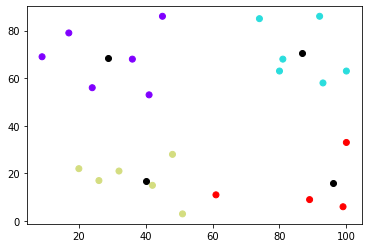

In [8]:
#scatterplot of original categories with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df['feature1'],df['feature2'], c=df['category'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [9]:
#add a new column to dataframe called "cluster"
#can use this to compare features of clusters to original categories
df['cluster'] = kmeans.labels_

**Category number and cluster number will not always be the same!**

Cluster number is assigned based on the index number of the centroid a data point is closest to.

In [10]:
#dataframe with new cluster column
df.head()

,feature1,feature2,category,cluster
0,9,69,0,3
1,17,79,0,3
2,24,56,0,3
3,36,68,0,3
4,41,53,0,3


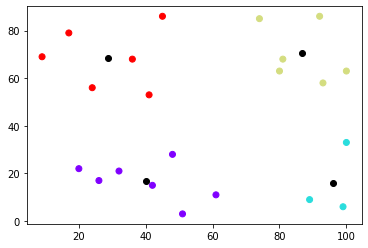

In [11]:
#scatterplot of k-means predicted clusters with calculated centroids

#k-means predicted clusters for the original data features
plt.scatter(df['feature1'],df['feature2'], c=df['cluster'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

K Means classified (61,11) as category 2 instead of 3 (original 'C' column)

In [12]:
#predict category of new data point
kpred = [50,50]

#model thinks new data point belongs to upper-left cluster
print(kmeans.predict([kpred]))

[3]


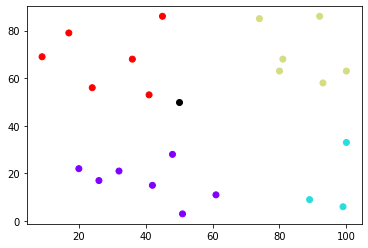

In [13]:
#see plot of new data point

#k-means predicted clusters (in color) for the data points
plt.scatter(df['feature1'],df['feature2'], c=df['cluster'], cmap= 'rainbow')

#new data point is the black dot
plt.scatter(kpred[0],kpred[1],c='black')

## Iris Flowers

In the example below, we will use the Iris sample dataset from the Scikit-learn (sklearn) library.

In [14]:
from sklearn import datasets

In [15]:
#load in the "box" of items that belong to the iris data
iris_box = datasets.load_iris()

In [16]:
#items that are in the iris "box"
iris_box.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### Items that are contained in each key

**data**: Iris dataset (raw data, no column headers, no target variable)

**target**: contains a single array of all the target variable values (in order of the row numbers in "data")

**target_names**: contains the distinct (unique) category values from the target variable

**DESCR**: contains a description of the dataset

**feature_names**: contains a list of all the column header names for "data" (does not have target column header name)

In [17]:
print(iris_box.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [18]:
#make a dataframe from the "data" key
#add column headers from "feature_names" key
irisdf = pd.DataFrame(data=iris_box.data, columns=iris_box.feature_names)
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
#add target variable values to the dataframe
#values are in order of the row they belong to
irisdf['cat_num'] = iris_box.target
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cat_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
#species names from "target_names"
#species column numbers are in order of this index (0=setosa, 1=versicolor, 2=virginica)
iris_box.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
#change number in species column to species name
irisdf['species'] = irisdf['cat_num'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cat_num,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [22]:
#descriptive statistics of Iris dataset
irisdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cat_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [23]:
#average measurements for each iris flower species characteristics (sepal length & width, petal length & width)
irisdf.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cat_num
species,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


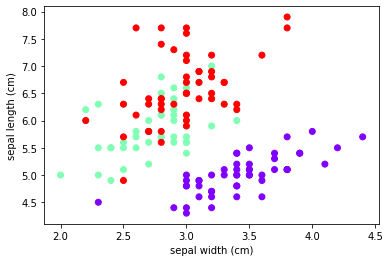

In [24]:
#plot iris species by sepal width vs length

#purple cluster is setosa
#green cluster is versicolor
#red cluster is virginica
plt.xlabel('sepal width (cm)')
plt.ylabel('sepal length (cm)')
plt.scatter(irisdf['sepal width (cm)'], irisdf['sepal length (cm)'], c=irisdf['cat_num'], cmap='rainbow')

Text(0, 0.5, 'petal length (cm)')

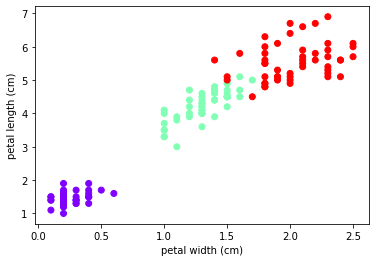

In [25]:
#plot iris species by petal width vs length

#purple cluster is setosa
#green cluster is versicolor
#red cluster is virginica
plt.scatter(irisdf['petal width (cm)'], irisdf['petal length (cm)'], c=irisdf['cat_num'], cmap='rainbow')

plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')

#### Let's see if the k-means algorithm can figure out that the clusters relate to iris flower species

First, we'll try it with the entire dataset. Then later we'll add a new data point (flower) and see which species (target) it will classify it as.

In [26]:
#dataframe containing only predictive features
X = irisdf.drop(['species', 'cat_num'], axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y = irisdf['cat_num'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cat_num, dtype: int32

In [28]:
#initialize the k-means algorithm
#setting it to find 3 clusters (category groups)
kmeans = KMeans(n_clusters=3)

In [29]:
#teach the model where the data points are
#calculates centroids
#classifes data points to a cluster depending on closest centroid
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
#data point coordinates for centroids of each cluster
#each line is a flower species (cluster)

#index 0 is versicolor
#index 1 is setosa
#index 2 is virginica
print(kmeans.cluster_centers_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


Text(0, 0.5, 'sepal length (cm)')

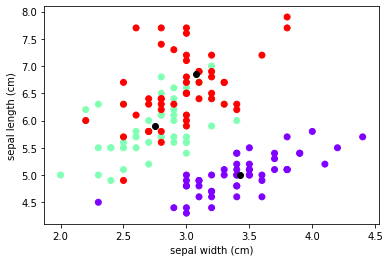

In [31]:
#scatterplot of sepal width & length with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(irisdf['sepal width (cm)'], irisdf['sepal length (cm)'], c=irisdf['cat_num'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('sepal width (cm)')
plt.ylabel('sepal length (cm)')

Text(0, 0.5, 'petal length (cm)')

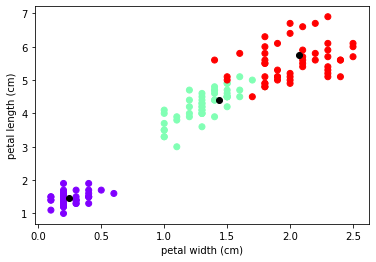

In [32]:
#scatterplot of petal width & length with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(irisdf['petal width (cm)'], irisdf['petal length (cm)'], c=irisdf['cat_num'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,2], c='black')

plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')

In [33]:
irisdf['clusters'] = kmeans.labels_
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cat_num,species,clusters
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1


Text(0, 0.5, 'sepal length (cm)')

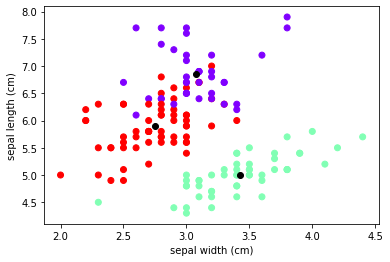

In [34]:
#scatterplot of sepal width & length 
#predicted cluster group with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(irisdf['sepal width (cm)'], irisdf['sepal length (cm)'], c=irisdf['clusters'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('sepal width (cm)')
plt.ylabel('sepal length (cm)')

Text(0, 0.5, 'petal length (cm)')

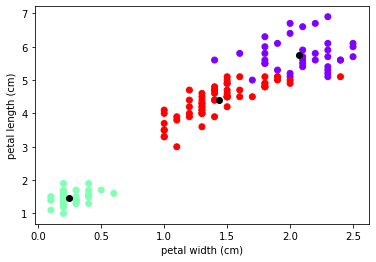

In [35]:
#scatterplot of petal width & length 
#predicted cluster group with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(irisdf['petal width (cm)'], irisdf['petal length (cm)'], c=irisdf['clusters'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,2], c='black')

plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')

In [36]:
#new flower data point
#sepal length=7.2, sepal width=3.5, petal length=0.8, petal width=1.6

point = [7.2, 3.5, 0.8, 1.6]

#predict category of new data point
#model thinks new data point belongs to setosa cluster (1)
print(kmeans.predict([point]))

[1]


Text(0, 0.5, 'sepal length (cm)')

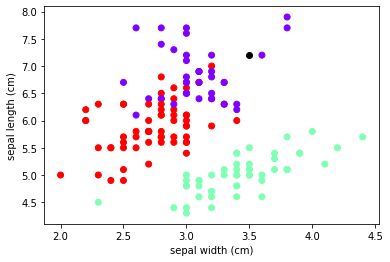

In [37]:
#see plot of new data point for sepal width & length

#k-means predicted clusters (in color) for the data points
plt.scatter(irisdf['sepal width (cm)'], irisdf['sepal length (cm)'], c=irisdf['clusters'], cmap= 'rainbow')

#new data point is the black dot
plt.scatter(point[1],point[0],c='black')

plt.xlabel('sepal width (cm)')
plt.ylabel('sepal length (cm)')

Text(0, 0.5, 'petal length (cm)')

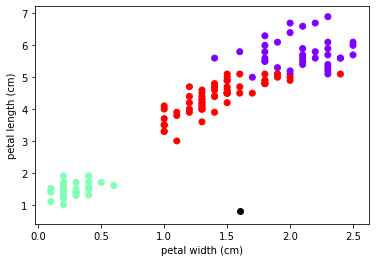

In [38]:
#see plot of new data point

#k-means predicted clusters (in color) for the data points
plt.scatter(irisdf['petal width (cm)'], irisdf['petal length (cm)'], c=irisdf['clusters'], cmap= 'rainbow')

#new data point is the black dot
plt.scatter(point[3],point[2],c='black')

plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')